# Welcome to General Health Prediction using Machine Learning

## Introduction

This project aims to predict health status using machine learning techniques. The steps involved include:

1. **Objective**: Predict health status from a dataset using machine learning.
2. **Algorithms**:
    - Support Vector Machine (SVM)
    - Random Forest
    - Logistic Regression
3. **Data Preparation**:
    - Split dataset into 80% training and 20% testing sets.
4. **Model Training**:
    - Train SVM, Random Forest, and Logistic Regression models on the training data.
5. **Model Evaluation**:
    - Evaluate models using accuracy scores, classification reports, and confusion matrices.
6. **Comparison**:
    - Compare the accuracies of the models using a bar chart.
7. **Hyperparameter Tuning**:
    - Use randomized grid search to find the best hyperparameters for each model.
8. **Prediction**:
    - Predict health status for a single input to demonstrate the system's functionality.

This project aims to provide a clear and structured approach to building, evaluating, and optimizing machine learning models for health prediction.

### Step 1: Data Collection




*Importing Libraries*

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

*Importing dataset*

In [ ]:
dataset = pd.read_csv('CVD_cleaned.csv')

In [ ]:
print(dataset)
print(dataset.head())

       General_Health                  Checkup Exercise Heart_Disease  \
0                Poor  Within the past 2 years       No            No   
1           Very Good     Within the past year       No           Yes   
2           Very Good     Within the past year      Yes            No   
3                Poor     Within the past year      Yes           Yes   
4                Good     Within the past year       No            No   
...               ...                      ...      ...           ...   
308849      Very Good     Within the past year      Yes            No   
308850           Fair  Within the past 5 years      Yes            No   
308851      Very Good      5 or more years ago      Yes            No   
308852      Very Good     Within the past year      Yes            No   
308853      Excellent     Within the past year      Yes            No   

       Skin_Cancer Other_Cancer Depression  \
0               No           No         No   
1               No           No

In [ ]:
dataset.describe()

,Height_(cm),Weight_(kg),BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
count,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000
mean,170.615249,83.588655,28.626211,5.096366,29.835200,15.110441,6.296616
std,10.658026,21.343210,6.522323,8.199763,24.875735,14.926238,8.582954
min,91.000000,24.950000,12.020000,0.000000,0.000000,0.000000,0.000000
25%,163.000000,68.040000,24.210000,0.000000,12.000000,4.000000,2.000000
50%,170.000000,81.650000,27.440000,1.000000,30.000000,12.000000,4.000000
75%,178.000000,95.250000,31.850000,6.000000,30.000000,20.000000,8.000000
max,241.000000,293.020000,99.330000,30.000000,120.000000,128.000000,128.000000


### Step 2: Data Preprocessing

*Identifying or detecting missing values and outliers if any*.

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from scipy import stats

# Check for missing values
missing_values = dataset.isnull().sum()

# Display results
print("Missing Values:\n", missing_values)

Missing Values:
 General_Health                  0
Checkup                         0
Exercise                        0
Heart_Disease                   0
Skin_Cancer                     0
Other_Cancer                    0
Depression                      0
Diabetes                        0
Arthritis                       0
Sex                             0
Age_Category                    0
Height_(cm)                     0
Weight_(kg)                     0
BMI                             0
Smoking_History                 0
Alcohol_Consumption             0
Fruit_Consumption               0
Green_Vegetables_Consumption    0
FriedPotato_Consumption         0
dtype: int64


         Height_(cm)    Weight_(kg)            BMI  Fruit_Consumption  \
count  308854.000000  308854.000000  308854.000000      308854.000000   
mean      170.615249      83.588655      28.626211          29.835200   
std        10.658026      21.343210       6.522323          24.875735   
min        91.000000      24.950000      12.020000           0.000000   
25%       163.000000      68.040000      24.210000          12.000000   
50%       170.000000      81.650000      27.440000          30.000000   
75%       178.000000      95.250000      31.850000          30.000000   
max       241.000000     293.020000      99.330000         120.000000   

       Green_Vegetables_Consumption  FriedPotato_Consumption  
count                 308854.000000            308854.000000  
mean                      15.110441                 6.296616  
std                       14.926238                 8.582954  
min                        0.000000                 0.000000  
25%                        

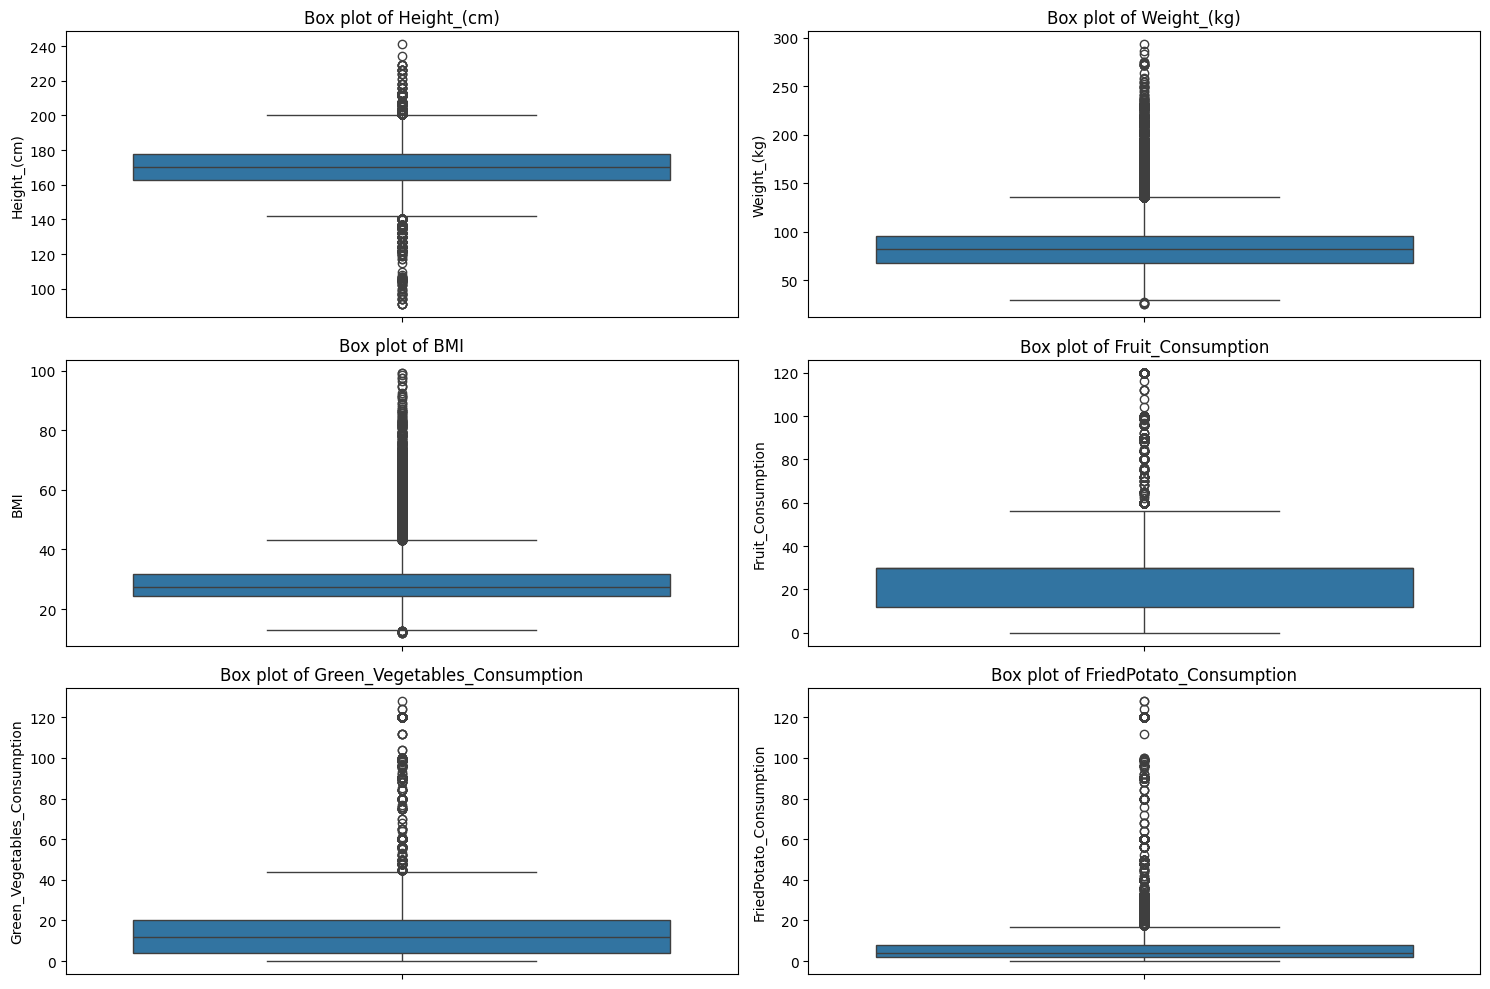

In [ ]:
# Select numerical columns
numerical_columns = ['Height_(cm)', 'Weight_(kg)', 'BMI', 'Fruit_Consumption', 'Green_Vegetables_Consumption', 'FriedPotato_Consumption']

# Summary statistics
print(dataset[numerical_columns].describe())

# Visualize with box plots
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(dataset[col])
    plt.title(f'Box plot of {col}')
plt.tight_layout()
plt.show()

In [ ]:
# Function to calculate IQR and identify outliers
def identify_outliers(dataset, column):
    Q1 = dataset[column].quantile(0.25)
    Q3 = dataset[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = dataset[(dataset[column] < lower_bound) | (dataset[column] > upper_bound)]
    return outliers
columns_to_check = ['Height_(cm)', 'Weight_(kg)', 'BMI', 'Fruit_Consumption',
                    'Green_Vegetables_Consumption', 'FriedPotato_Consumption']

# Identify outliers for each column
outliers_dict = {}
for column in columns_to_check:
    outliers_dict[column] = identify_outliers(dataset, column)
    print(f'{column} has {len(outliers_dict[column])} outliers.')

# Example: Display outliers for 'Height_(cm)'
outliers_dict['Height_(cm)']


Height_(cm) has 1055 outliers.
Weight_(kg) has 7326 outliers.
BMI has 9530 outliers.
Fruit_Consumption has 68225 outliers.
Green_Vegetables_Consumption has 11878 outliers.
FriedPotato_Consumption has 19456 outliers.


,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
181,Good,Within the past year,Yes,No,Yes,No,No,No,No,Male,75-79,206,86.18,20.36,No,0,30,1,0
454,Fair,Within the past year,Yes,No,No,No,No,Yes,Yes,Female,65-69,140,99.34,50.90,No,0,30,8,1
576,Good,Within the past year,Yes,No,No,No,No,No,Yes,Female,75-79,135,33.11,18.27,Yes,0,30,8,8
1734,Good,Within the past year,Yes,No,No,No,No,Yes,No,Male,40-44,201,131.54,32.67,Yes,0,16,30,4
1764,Good,Within the past 5 years,Yes,No,No,No,Yes,No,No,Male,25-29,218,72.57,15.21,No,0,0,20,99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307810,Good,Within the past year,Yes,No,No,No,No,No,No,Female,40-44,140,54.88,28.12,No,0,30,30,0
308223,Good,Within the past year,Yes,No,No,No,No,No,No,Male,75-79,135,65.77,36.29,Yes,0,60,30,0
308444,Poor,Within the past year,Yes,No,No,No,No,"No, pre-diabetes or borderline diabetes",Yes,Female,75-79,140,74.84,38.35,No,4,30,30,8
308560,Fair,Within the past year,Yes,Yes,No,Yes,No,Yes,Yes,Female,65-69,135,102.06,56.32,No,0,60,60,0


In [ ]:
def cap_outliers(dataset, column, lower_percentile=0.01, upper_percentile=0.99):
    lower_bound = dataset[column].quantile(lower_percentile)
    upper_bound = dataset[column].quantile(upper_percentile)
    dataset[column] = np.where(dataset[column] < lower_bound, lower_bound, dataset[column])
    dataset[column] = np.where(dataset[column] > upper_bound, upper_bound, dataset[column])
    return dataset

# Cap outliers for each column
for column in columns_to_check:
    dataset = cap_outliers(dataset, column)


In [ ]:
from scipy import stats

def transform_outliers(dataset, column):
    dataset[column], _ = stats.boxcox(dataset[column] + 1)  # Adding 1 to avoid log(0)
    return dataset

# Transform outliers for each column
for column in columns_to_check:
    dataset = transform_outliers(dataset, column)


In [ ]:
#*Removing the outliers*
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return dataset[(dataset[column] >= lower_bound) & (dataset[column] <= upper_bound)]

# Remove outliers from each numerical column
for col in numerical_columns:
    dataset = remove_outliers(dataset, col)

# Check the cleaned data
print(dataset[numerical_columns].describe())

# Save the cleaned data
dataset.to_csv('cleaned3_healthdata.csv', index=False)

         Height_(cm)    Weight_(kg)            BMI  Fruit_Consumption  \
count  280559.000000  280559.000000  280559.000000      280559.000000   
mean       13.212940       2.895216       1.269025           5.268204   
std         0.318862       0.095303       0.017651           2.005813   
min        12.557217       2.673656       1.226083           0.773515   
25%        12.980388       2.825571       1.257307           3.923925   
50%        13.198897       2.899411       1.268523           6.139167   
75%        13.441327       2.959822       1.280986           6.139167   
max        13.876805       3.121574       1.311156           9.395187   

       Green_Vegetables_Consumption  FriedPotato_Consumption  
count                 280559.000000            280559.000000  
mean                       3.499589                 1.622001  
std                        1.764511                 0.954718  
min                        0.000000                 0.000000  
25%                        

In [ ]:
# Function to calculate IQR and identify outliers
def identify_outliers(dataset, column):
    Q1 = dataset[column].quantile(0.25)
    Q3 = dataset[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = dataset[(dataset[column] < lower_bound) | (dataset[column] > upper_bound)]
    return outliers
columns_to_check = ['Height_(cm)', 'Weight_(kg)', 'BMI', 'Fruit_Consumption',
                    'Green_Vegetables_Consumption', 'FriedPotato_Consumption']

# Identify outliers for each column
outliers_dict = {}
for column in columns_to_check:
    outliers_dict[column] = identify_outliers(dataset, column)
    print(f'{column} has {len(outliers_dict[column])} outliers.')

# Example: Display outliers for 'Height_(cm)'
outliers_dict['Height_(cm)']

Height_(cm) has 0 outliers.
Weight_(kg) has 0 outliers.
BMI has 0 outliers.
Fruit_Consumption has 28295 outliers.
Green_Vegetables_Consumption has 0 outliers.
FriedPotato_Consumption has 0 outliers.


,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption


The resulting DataFrame is now free from missing values and has had outliers removed.

In [ ]:
#*Load the cleaned dataset*
dataset = pd.read_csv('cleaned3_healthdata.csv')

*Identify and handle categorical and numerical columns*

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import seaborn as sns

 *Identify categorical and numerical columns*

In [ ]:
# Ensure 'General_Health' is treated as categorical
dataset['General_Health'] = dataset['General_Health'].astype('category')

# Identify and encode categorical columns (excluding the target column)
categorical_columns = dataset.select_dtypes(include=['object']).columns
categorical_columns = categorical_columns.drop('General_Health', errors='ignore')
dataset = pd.get_dummies(dataset, columns=categorical_columns)

In [ ]:
# Scale numerical features
numerical_columns = dataset.select_dtypes(include=['int64', 'float64']).columns
numerical_columns = numerical_columns.drop('General_Health', errors='ignore')
scaler = StandardScaler()
dataset[numerical_columns] = scaler.fit_transform(dataset[numerical_columns])

In [ ]:
# Separate features and target
x = dataset.drop(columns=['General_Health'], errors='ignore')
y = dataset['General_Health']

In [ ]:
# Convert target variable to integer labels for classification
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

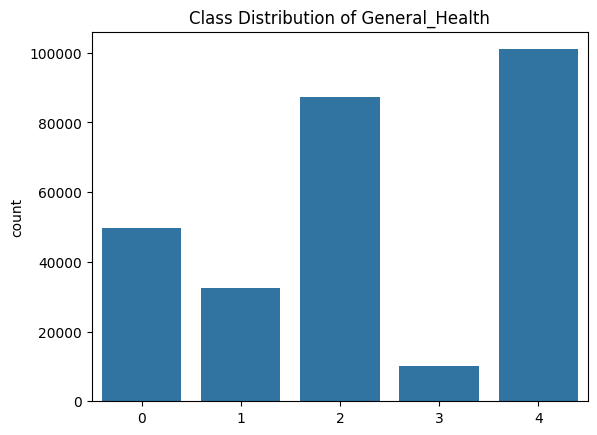

In [ ]:
# Check class distribution
sns.countplot(x=y)
plt.title('Class Distribution of General_Health')
plt.show()

###Step 3: Split dataset with 8:2 ratio for train and test sets

*Split dataset into 80% training and 20% test*

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
print(x_train)
print(x_train.shape)

        Height_(cm)  Weight_(kg)       BMI  Alcohol_Consumption  \
245210     0.433896     1.043765  0.954192            -0.625705   
91118     -1.847368    -1.868851 -1.045717            -0.625705   
39025      0.716260     1.373091  1.185589            -0.015524   
156904     0.433896     0.375499  0.204052            -0.259597   
81873      0.902727     0.479445  0.048151            -0.625705   
...             ...          ...       ...                  ...   
197327    -0.237866     0.268321  0.500106            -0.625705   
104742    -1.029075    -2.238491 -2.107338            -0.381633   
43770     -1.332638    -0.220901  0.535938            -0.625705   
121002    -1.332638    -0.730772 -0.032098             0.228548   
140993    -0.531536     0.479445  0.866490             0.838729   

        Fruit_Consumption  Green_Vegetables_Consumption  \
245210          -1.585163                     -0.842281   
91118            0.434220                     -1.031410   
39025            1

In [ ]:
print(x_test)
print (x_test.shape)

        Height_(cm)  Weight_(kg)       BMI  Alcohol_Consumption  \
105302     0.716260     1.435044  1.250703            -0.625705   
92019     -1.029075    -1.357600 -0.952727            -0.625705   
137451    -0.237866    -1.357600 -1.486846            -0.625705   
139883    -0.044041    -1.031235 -1.229136            -0.503669   
120994    -0.729317    -1.830267 -1.749274            -0.503669   
...             ...          ...       ...                  ...   
158495     0.433896    -0.196179 -0.487339            -0.625705   
214808    -0.044041    -0.146707 -0.123859             3.035379   
61333     -0.531536    -1.031235 -0.888175            -0.625705   
215330    -0.237866    -1.093831 -1.141307            -0.625705   
12508      1.362870     1.373091  0.826841            -0.625705   

        Fruit_Consumption  Green_Vegetables_Consumption  \
105302           1.526852                      0.108947   
92019            0.434220                      0.422921   
137451           0

In [ ]:
print(y_train)
print(y_train.shape)

[1 4 4 ... 1 4 4]
(224447,)


In [ ]:
print(y_test)
print(y_test.shape)

[1 1 4 ... 4 4 1]
(56112,)


*Dimensionality reduction using PCA*

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)  # Adjust the number of components as needed
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)


*Feature scaling*



In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
sc = StandardScaler()
X_train = sc.fit_transform(x_train_pca)
X_test = sc.transform(x_test_pca)

### Step 3: Choosing Machine Learning Model

When it comes to choosing a machine learning model for a classification problem, the decision should be guided by the nature of the dataset, the problem requirements, and the performance of the models on the data. In this guide, we will focus on three commonly used classification algorithms: Support Vector Machine (SVM), Random Forest, and Logistic Regression. Each of these models has its strengths and weaknesses, and understanding these can help us make an informed decision.

### Step 4: Model Training and Evaluation

### Support Vector machine Model

*Initializing model*

In [ ]:
from sklearn.svm import SVC
svm = SVC(kernel='linear', random_state=42)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

from scipy.stats import uniform
#Train the model
svm.fit(X_train, y_train)
#Predict the test result
svm_pred = svm.predict(X_test)

# Use a subset of the training data for hyperparameter tuning
subset_size = 10000  # You can adjust this number
x_train_subset = X_train[:subset_size]
y_train_subset = y_train[:subset_size]

# Hyperparameter tuning using RandomizedSearchCV
param_distributions = {
    'C': uniform(0.1, 10),
    'gamma': uniform(0.001, 0.1),
    'kernel': ['linear', 'rbf']
}

svm = SVC()
random_search = RandomizedSearchCV(svm, param_distributions, n_iter=20, cv=3, verbose=1, n_jobs=-1, random_state=1)
random_search.fit(x_train_subset, y_train_subset)

# Best parameters and estimator
best_params = random_search.best_params_
best_estimator = random_search.best_estimator_

print("Best Parameters:", best_params)

# Evaluate the best SVM model
y_pred_svm = best_estimator.predict(X_test)
print("SVM Model Accuracy:", accuracy_score(y_test, y_pred_svm))
print("SVM Classification Report:\n", classification_report(y_test, y_pred_svm))
print("SVM Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))


Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best Parameters: {'C': np.float64(9.133701664788672), 'gamma': np.float64(0.012949046798071684), 'kernel': 'rbf'}
SVM Model Accuracy: 0.41215782720273736
SVM Classification Report:
               precision    recall  f1-score   support

           0       0.32      0.01      0.03      9963
           1       0.50      0.00      0.00      6486
           2       0.39      0.46      0.42     17464
           3       1.00      0.00      0.00      1999
           4       0.43      0.74      0.54     20200

    accuracy                           0.41     56112
   macro avg       0.53      0.24      0.20     56112
weighted avg       0.43      0.41      0.33     56112

SVM Confusion Matrix:
 [[  136     0  1498     0  8329]
 [   18     1  4481     0  1986]
 [  110     0  8048     0  9306]
 [    8     1  1645     1   344]
 [  149     0  5110     0 14941]]


In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV

### Random Forest Model

*Train the Random Forest model*

In [ ]:

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_jobs=-1)
rf.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1)

*Predict the test set*

In [ ]:

y_pred_rf = rf.predict(X_test)

*Evaluate the Random Forest model*

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
rf_acc = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {rf_acc}")
print("\nRandom Forest Classification Report:\n", classification_report(y_test, y_pred_rf))
print("\nRandom Forest Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

Random Forest Accuracy: 0.4019639292842886

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.39      0.22      0.28      9963
           1       0.32      0.16      0.21      6486
           2       0.39      0.46      0.42     17464
           3       0.27      0.05      0.08      1999
           4       0.43      0.56      0.49     20200

    accuracy                           0.40     56112
   macro avg       0.36      0.29      0.30     56112
weighted avg       0.39      0.40      0.38     56112


Random Forest Confusion Matrix:
 [[ 2145    99  1950     7  5762]
 [  144  1022  3576   138  1606]
 [  983  1139  8010    86  7246]
 [   25   522  1042    98   312]
 [ 2234   457  6198    31 11280]]


### Logistic Regression Model

In [ ]:
from sklearn.linear_model import LogisticRegression

# Train the Logistic Regression model
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

# Evaluate the Logistic Regression model
y_pred_lr = lr.predict(X_test)
print("Logistic Regression Model Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_lr))
print("Logistic Regression Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))


Logistic Regression Model Accuracy: 0.4178428856572569
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.46      0.10      0.16      9963
           1       0.36      0.11      0.17      6486
           2       0.40      0.44      0.42     17464
           3       0.36      0.02      0.04      1999
           4       0.43      0.70      0.53     20200

    accuracy                           0.42     56112
   macro avg       0.40      0.27      0.26     56112
weighted avg       0.41      0.42      0.37     56112

Logistic Regression Confusion Matrix:
 [[  971    20  1357     3  7612]
 [   39   711  3780    43  1913]
 [  316   590  7642    18  8898]
 [   10   453  1148    40   348]
 [  796   202  5114     6 14082]]


In [ ]:
# Hyperparameter tuning and training for Logistic Regressionp
param_distributions_lr = {
    'C': uniform(0.1, 10),
    'solver': ['newton-cg', 'lbfgs', 'liblinear']
}
lr = LogisticRegression(max_iter=1000)
random_search_lr = RandomizedSearchCV(lr, param_distributions_lr, n_iter=20, cv=3, verbose=1, n_jobs=-1, random_state=1)
random_search_lr.fit(X_train, y_train)
# Make predictions and evaluate Logistic Regression
y_pred_lr = random_search_lr.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
report_lr = classification_report(y_test, y_pred_lr)
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)

print("Logistic Regression Model Accuracy:", accuracy_lr)
print("Classification Report:\n", report_lr)
print("Confusion Matrix:\n", conf_matrix_lr)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Logistic Regression Model Accuracy: 0.4178250641573995
Classification Report:
               precision    recall  f1-score   support

           0       0.46      0.10      0.16      9963
           1       0.36      0.11      0.17      6486
           2       0.40      0.44      0.42     17464
           3       0.36      0.02      0.04      1999
           4       0.43      0.70      0.53     20200

    accuracy                           0.42     56112
   macro avg       0.40      0.27      0.26     56112
weighted avg       0.41      0.42      0.37     56112

Confusion Matrix:
 [[  972    21  1356     3  7611]
 [   39   711  3782    41  1913]
 [  316   589  7641    18  8900]
 [   10   454  1149    38   348]
 [  796   202  5113     6 14083]]


In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score


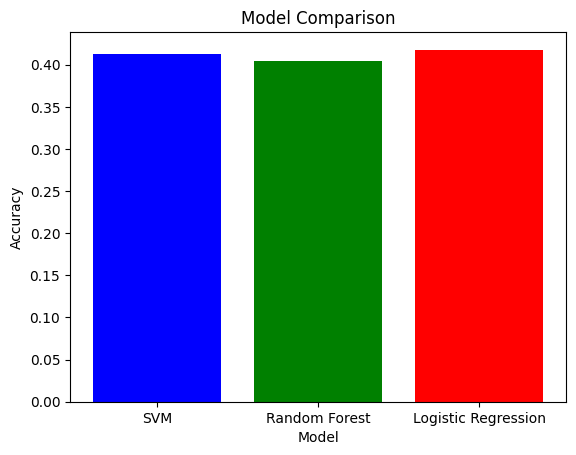

In [ ]:
# Compare the accuracies
models = ['SVM', 'Random Forest', 'Logistic Regression']
accuracies = [accuracy_score(y_test, y_pred_svm), accuracy_score(y_test, y_pred_rf), accuracy_score(y_test, y_pred_lr)]

plt.bar(models, accuracies, color=['blue', 'green', 'red'])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Comparison')
plt.show()

From the three above models now I choose Logistic Regression by observing the graph.

In [ ]:
My_model = LogisticRegression()
My_model.fit(X_train, y_train)


LogisticRegression()

In [ ]:
My_health= [["Excellent","Within the past 2 years","Yes","No","No","No","No","No","No","Female",70-74,152,52.16,22.46,"No",0,30,4,0]]
predictions = My_model.predict(My_health)